# CogStat in Jupyter Notebook

(The table of contents below may not be visible on all systems.)
<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>
<script src="https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js"></script>

CogStat is an open source and free statistical tool written in Python. It helps you to choose and collect the most typical statistical analysis for a task, making the analysis faster, more precise and more efficient.

CogStat can be used in Jupyter Notebook. This tutorial presents the main functions of CogStat (as in version 2.0), and it shows how to use them.

In [1]:
%matplotlib inline

import sys
import os
import pandas as pd

# Import CogStat, and we will abbreviate it as cs
from cogstat import cogstat as cs
# The version of CogStat is available in the __version__ variable
print(cs.__version__)

cs_dir, dummy_filename = os.path.split(cs.__file__)  # We use this for the demo data

2.0.0dev


# Quick demo

,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


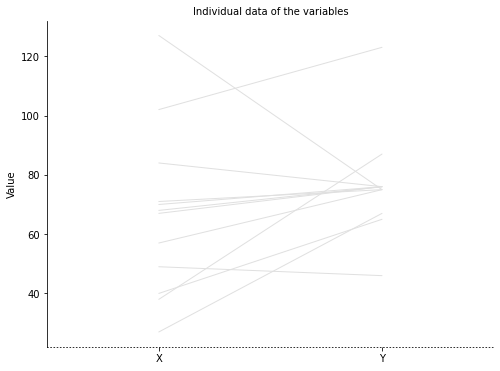

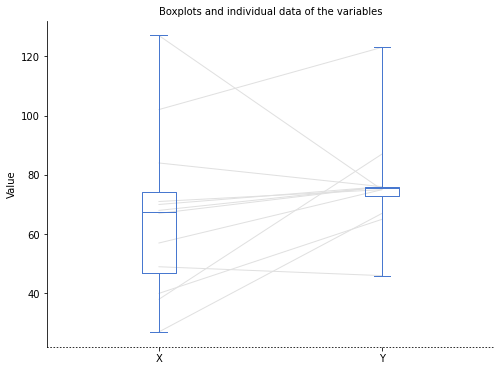

,Point estimation,95% CI (low),95% CI (high)
X,66.7,48.8,84.6
Y,76.4,65.2,87.6
,Point estimation,95% CI (low),95% CI (high)
Hedges' g,-0.400,-1.061,0.260


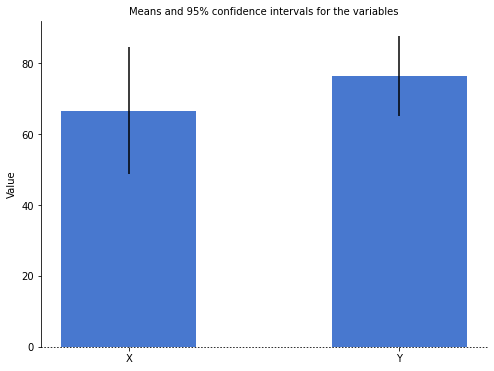

TIME,day,night
N of valid cases,6,6
N of missing cases,0,0


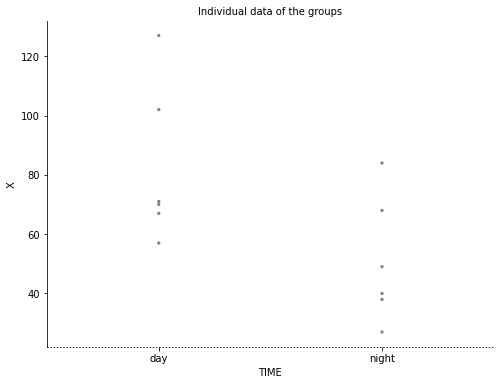

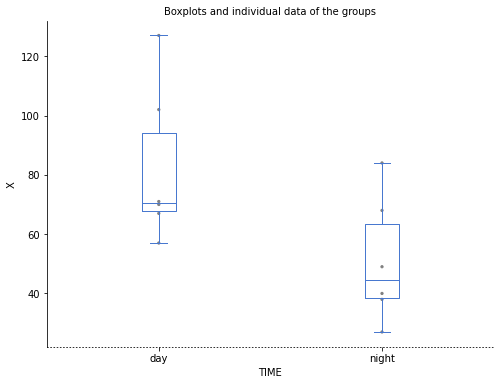

,Point estimation,95% CI (low),95% CI (high)
TIME,,,
day,82.3,54.4,110.3
night,51.0,28.7,73.3
Difference between the two groups:,31.3,0.4,62.3


,Point estimation,95% CI (low),95% CI (high)
Hedges' g,1.202,-0.196,2.600


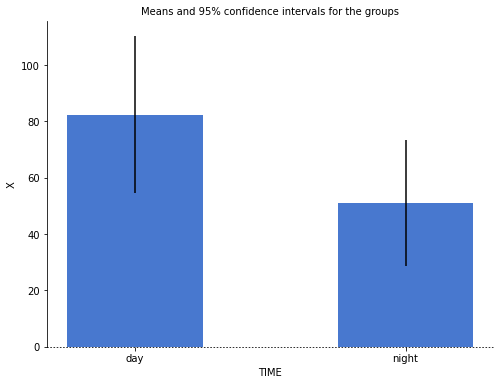

In [2]:
# Let's see a very quick demonstration, how CogStat works
# All results can be seen below. Appropriate graphs and statistics were chosen and compiled automatically by CogStat.

# Load some data
data = cs.CogStatData(data = os.path.join(cs_dir, 'sample_data', 'example_data.csv'))
# Display the data below
cs.display(data.print_data())
# Let's compare two variables
cs.display(data.compare_variables(['X', 'Y']))
# Let's compare two groups in a variable
cs.display(data.compare_groups('X', grouping_variables=['TIME']))

# Import and display data

CogStat can import from three sources:
- It can read from file (either SPSS .sav file or tab separated txt files)
- It can convert pandas data frames (only in the Jupyter Notebook interface)
- It can read multiline string

In [3]:
### Import from file ###

"""
The file should have the following structure:
- The first line should contain the names of the variables.
- The second lines can contain the measurement levels (int, ord or nom). This is optional, but recommended.
- The rest of the file is your data.
"""

# New CogStat data can be created with the CogStatData class of the cogstat module
# For importing a file, the data parameter should include tha path of the file
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data.csv'))
# The filename looks a bit complicated here, but it is only to make sure that the tutorial works OK.
# Instead you could use a simple path like this:
# data = cs.CogStatData(data='path/to/file/filename.csv')

# Now let's display our imported data.

# All methods of the CogStatData class return a list of html files and graphs.
# These items can be displayed with the cogstat.display function

# To display the current data, use the print_data() method to create the appropriate html output,
# and display it with the cogstat.display function
result = data.print_data()
cs.display(result)
# Or you can write it shorter:
cs.display(data.print_data())

# If your csv file doesn't include the measurement levels, you can specify them in the import process.
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data_no_levels.csv'), measurement_level='nom nom nom nom nom int ord ord')
cs.display(data.print_data())

# If your file does include the measurement levels, and you still specify it, then your specification 
# overwrites the file settings
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data.csv'), measurement_level='nom nom nom nom nom int ord ord')
cs.display(data.print_data())

# If your csv file doesn't include the measurement levels, and you do not specify them, then CogStat sets them 
# nom (nominal) for string variables and unk (unkown) otherwise.
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data_no_levels.csv'))
cs.display(data.print_data())

# Or simply read your SPSS .sav file
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data.sav'))
cs.display(data.print_data())


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,unk,nom,nom,nom,nom,nom,unk,unk,unk,unk
,1,day,a,A,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,A,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,A,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,A,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,unk,nom,nom,nom,nom,nom,unk,unk,unk,unk
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,unk,nom,nom,nom,nom,nom,unk,unk,unk,unk
,1,day,a,A,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,A,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,A,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,A,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,A,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,A,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,A,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,A,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


In [4]:
### Import from pandas ###

# First, we create a pandas dataframe
data = {'one' : [1., 3., 3., 4.],
        'two' : [4., 3., 2., 1.]}
pandas_data = pd.DataFrame(data)
print(pandas_data)

# Then we simply specify the pandas data to import
data = cs.CogStatData(data=pandas_data)
cs.display(data.print_data())

# Again, you can specify the measurement level
data = cs.CogStatData(data=pandas_data, measurement_level='ord ord')
cs.display(data.print_data())


   one  two
0  1.0  4.0
1  3.0  3.0
2  3.0  2.0
3  4.0  1.0


,one,two
Type,num,num
Level,unk,unk
,1,4
,3,3
,3,2
,4,1


,one,two
Type,num,num
Level,ord,ord
,1,4
,3,3
,3,2
,4,1


In [5]:
### Import from multiline string ###

# Use \t to separate columns and \n to separate rows.
data_string = '''A\tB\tC
nom\tint\tord
a\t123\t23
b\t143\t42'''

data = cs.CogStatData(data=data_string)
cs.display(data.print_data())

# measurement_level parameter can be used as in the case of the file and the pandas import

,A,B,C
Type,str,num,num
Level,nom,int,ord
,a,123,23
,b,143,42


# Filter outliers

Cases can be filtered based on outliers.

In its simplest form (2sd method) a case is an outlier if based on the appropriate variable its value is more extreme than the average +- 2 standard deviation.

When several variables are used for filtering, a case will be an outlier, if it is an outlier based on any of the variables.

Filtering is kept until a new filtering is set, which will overwrite the previous filtering.

In [6]:
# Let's import a data file
data = cs.CogStatData(data = os.path.join(cs_dir, 'sample_data', 'example_data.csv'))
cs.display(data.print_data())

# To turn on filtering based on a singla variable:
# Note that even if only a single variable is given, it should be in a list.
cs.display(data.filter_outlier(['X']))
cs.display(data.print_data())

# To turn on filtering based on several variables simultaniously:
cs.display(data.filter_outlier(['X', 'Y']))
cs.display(data.print_data())

# To turn off filtering:
cs.display(data.filter_outlier(None))
cs.display(data.print_data())

,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
5,6,day,a,B,B,A,127,75,657,43


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534
,9,day,d,AA,A,A,57,75,67,543


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
5,6,day,a,B,B,A,127,75,657,43
,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
0,1,day,a,AA,A,A,102,123,32,45


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534
,9,day,d,AA,A,A,57,75,67,543
,10,day,d,B,B,B,71,75,7,534


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


# Analyse the data

CogStat collects the most typical analysis into a single task, and chooses the appropriate methods. This is one of the main strength of CogStat: you don't have to figure out what statistics to use, and don't have to click through several menus and dialogs, but you get all the main (and only the relevant) information with a single command.

,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


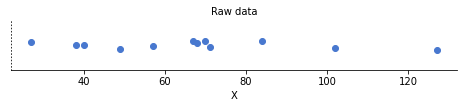

Value,Freq,Cum freq,Rel freq,Cum rel freq
27,1,1,8.3%,8.3%
38,1,2,8.3%,16.7%
40,1,3,8.3%,25.0%
49,1,4,8.3%,33.3%
57,1,5,8.3%,41.7%
67,1,6,8.3%,50.0%
68,1,7,8.3%,58.3%
70,1,8,8.3%,66.7%
71,1,9,8.3%,75.0%
84,1,10,8.3%,83.3%


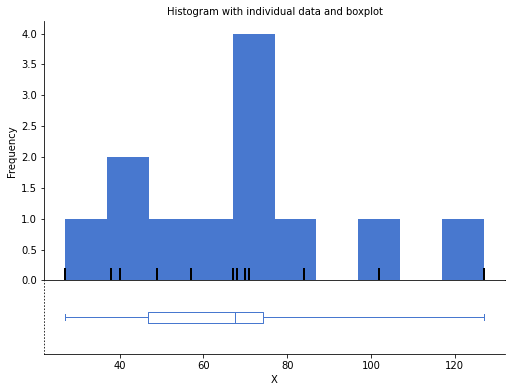

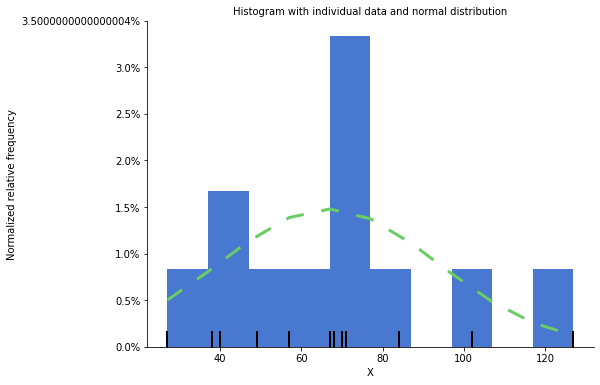

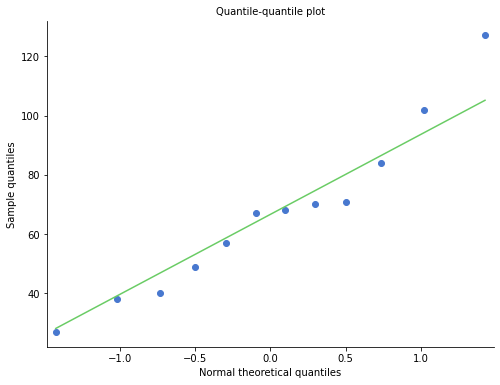

,Point estimation,95% confidence interval (high),95% confidence interval (low)
Mean,66.7,48.8,84.6
Standard deviation,28.2,,


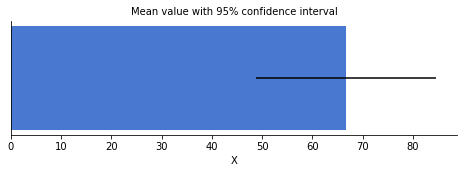

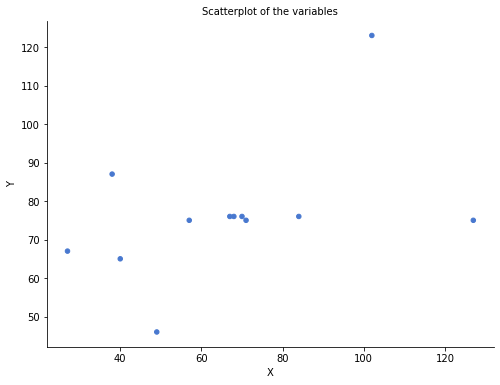

,Value
Pearson's correlation,r = 0.451
Spearman's rank-order correlation,rs = 0.384


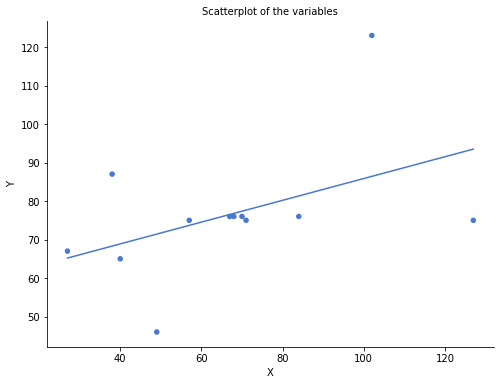

,Point estimation,95% confidence interval
"Pearson's correlation, r",0.451,"[-0.166, 0.814]"
"Spearman's rank-order correlation, rs",0.384,"[-0.244, 0.785]"


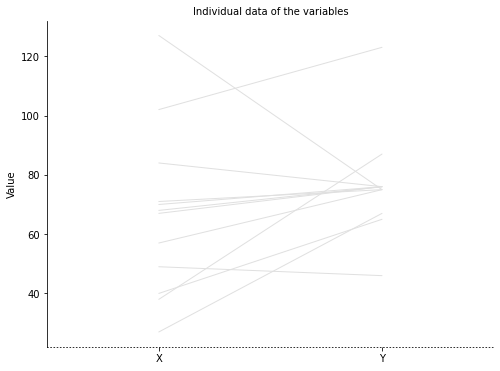

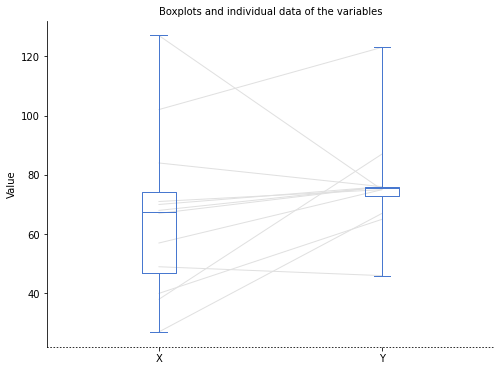

,Point estimation,95% CI (low),95% CI (high)
X,66.7,48.8,84.6
Y,76.4,65.2,87.6
,Point estimation,95% CI (low),95% CI (high)
Hedges' g,-0.400,-1.061,0.260


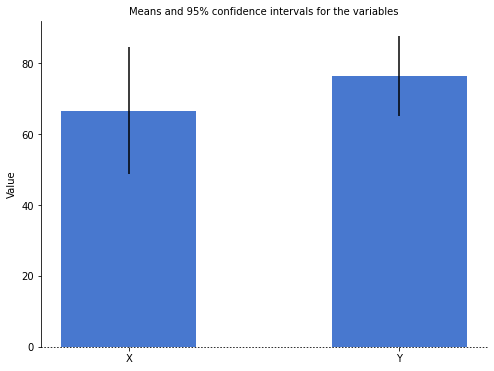

TIME,day,night
N of valid cases,6,6
N of missing cases,0,0


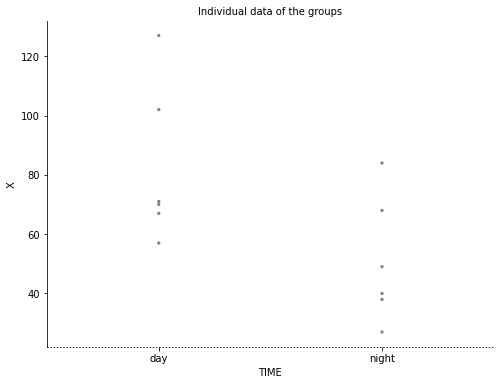

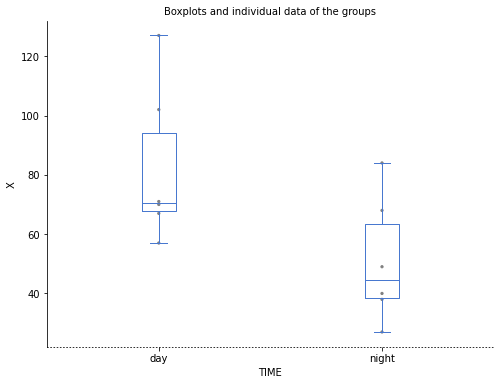

,Point estimation,95% CI (low),95% CI (high)
TIME,,,
day,82.3,54.4,110.3
night,51.0,28.7,73.3
Difference between the two groups:,31.3,0.4,62.3


,Point estimation,95% CI (low),95% CI (high)
Hedges' g,1.202,-0.196,2.600


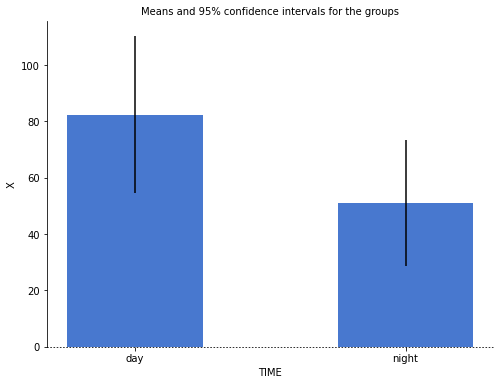

In [7]:
# Here are all the available CogStat analysis packages
# Hopefully all these method names speak for themselves
# In a function the chosen analysis will automatically depend on the measurement level, and other properties of the data.

# Load some data
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data.csv'))
# Display the data
cs.display(data.print_data())

### Explore variable ###
# Get the most important statistics of a single variable
cs.display(data.explore_variable('X', frequencies=True, central_value=0.0))
# A shorter, but less readable version:
#cs.display(data.explore_variable('X', 1, 0.0))

### Explore variable pair ###
# Get the statistics of a variable pair
# Optionally 
cs.display(data.explore_variable_pair('X', 'Y', xlims=[None, None], ylims=[None, None]))

### Pivot tables ###
# Pivot tables are only available from the GUI at the moment
# Fortunatelly, all CogStat pivot computations can be run in pandas

### Behavioral data diffusion analyses ###
# cs.display(data.diffusion(error_name=['error'], RT_name=['RT'], participant_name=['participant_id'], condition_names=['loudness', 'side']))

### Compare variables ###
# Specify two or more variables to compare
# Optionally set the visible range of the y axis
cs.display(data.compare_variables(['X', 'Y'], factors=[], ylims=[None, None]))
# To use several factors add the factor names and levels, too. Variable names will be assigned to the factor 
# level combinations automatically.
# cs.display(data.compare_variables(['F1S1', 'F1S2', 'F2S1', 'F2S2']), factors=[['first factor', 2], ['second factor', 2]])


### Compare groups ###
# Specify a dependent and a grouping variable
# Optionally set the visible range of the y axis
cs.display(data.compare_groups('X', grouping_variables=['TIME'], ylims=[None, None]))


# Summary (Cheatsheet)

,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
Type,num,str,str,str,str,str,num,num,num,num
Level,int,nom,nom,nom,nom,nom,int,int,ord,ord
,1,day,a,AA,A,A,102,123,32,45
,2,day,a,B,A,B,70,76,76,345
,3,night,a,AA,A,B,27,67,34,3
,4,night,a,B,B,B,38,87,345,43
,5,day,a,AA,B,A,67,76,356,345
,6,day,a,B,B,A,127,75,657,43
,7,night,s,AA,B,A,68,76,659,34
,8,night,s,B,B,B,49,46,758,534


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
5,6,day,a,B,B,A,127,75,657,43


,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
5,6,day,a,B,B,A,127,75,657,43
,CASE,TIME,TIME3,CONDITION,CONDITION2,CONDITION3,X,Y,Z,ZZ
0,1,day,a,AA,A,A,102,123,32,45


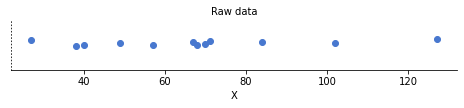

Value,Freq,Cum freq,Rel freq,Cum rel freq
27,1,1,8.3%,8.3%
38,1,2,8.3%,16.7%
40,1,3,8.3%,25.0%
49,1,4,8.3%,33.3%
57,1,5,8.3%,41.7%
67,1,6,8.3%,50.0%
68,1,7,8.3%,58.3%
70,1,8,8.3%,66.7%
71,1,9,8.3%,75.0%
84,1,10,8.3%,83.3%


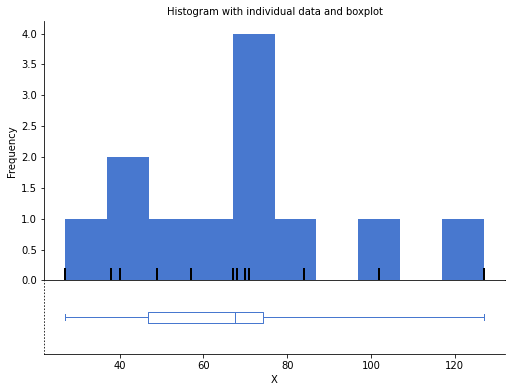

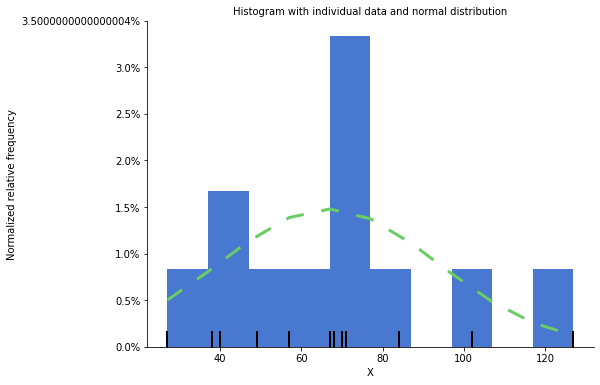

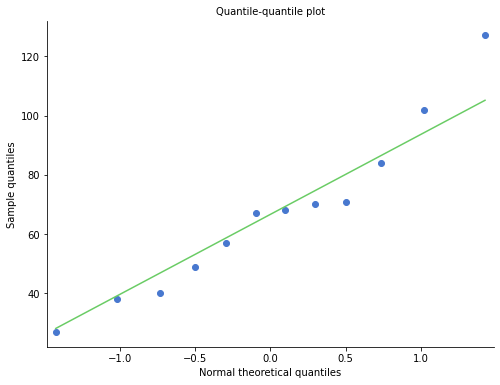

,Point estimation,95% confidence interval (high),95% confidence interval (low)
Mean,66.7,48.8,84.6
Standard deviation,28.2,,


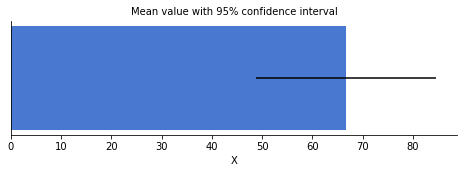

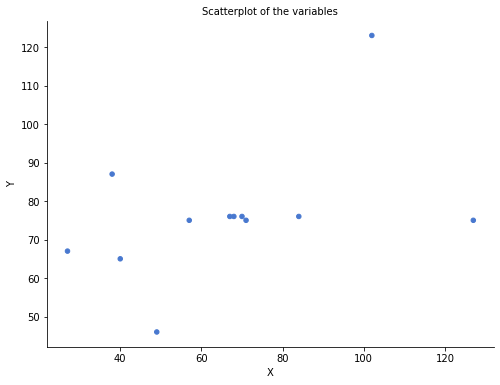

,Value
Pearson's correlation,r = 0.451
Spearman's rank-order correlation,rs = 0.384


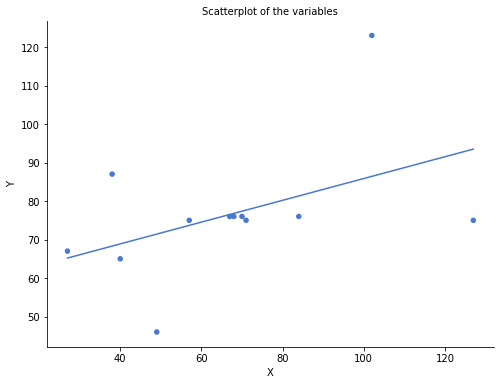

,Point estimation,95% confidence interval
"Pearson's correlation, r",0.451,"[-0.166, 0.814]"
"Spearman's rank-order correlation, rs",0.384,"[-0.244, 0.785]"


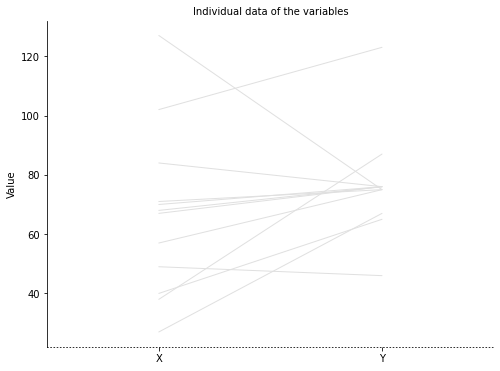

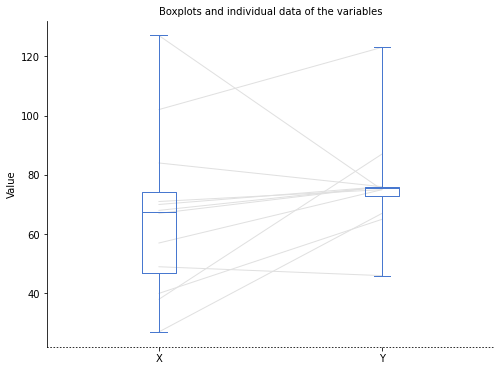

,Point estimation,95% CI (low),95% CI (high)
X,66.7,48.8,84.6
Y,76.4,65.2,87.6
,Point estimation,95% CI (low),95% CI (high)
Hedges' g,-0.400,-1.061,0.260


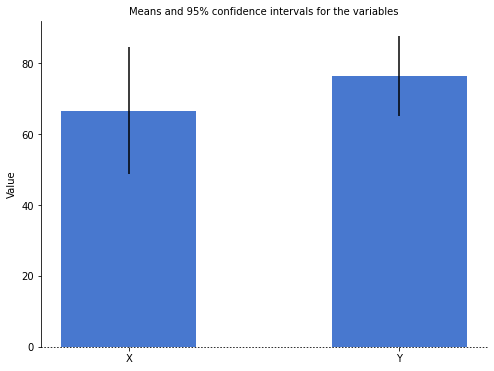

TIME,day,night
N of valid cases,6,6
N of missing cases,0,0


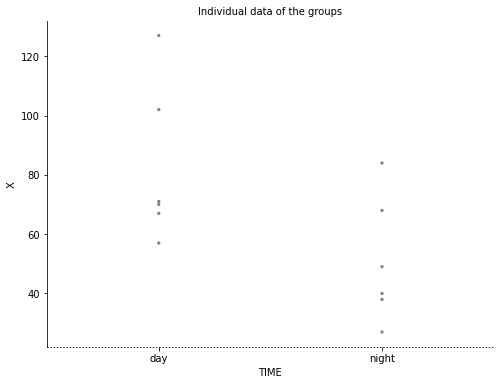

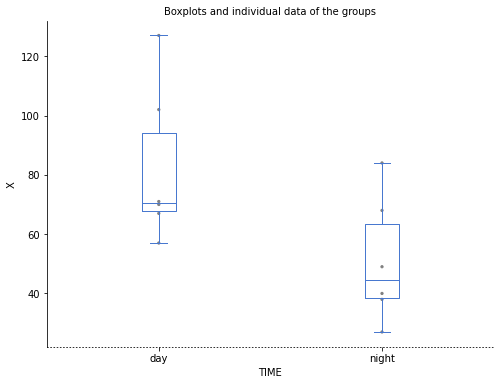

,Point estimation,95% CI (low),95% CI (high)
TIME,,,
day,82.3,54.4,110.3
night,51.0,28.7,73.3
Difference between the two groups:,31.3,0.4,62.3


,Point estimation,95% CI (low),95% CI (high)
Hedges' g,1.202,-0.196,2.600


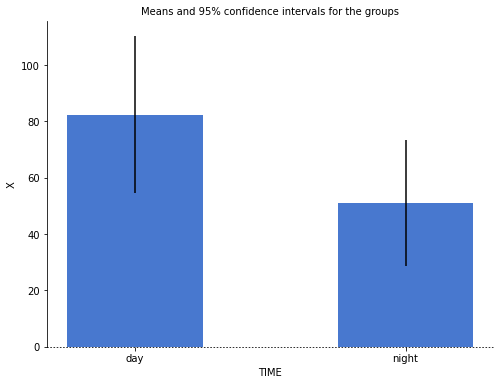

In [8]:
### Import data ###
# Import from file
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data.sav'))
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data.csv'))
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data.csv'), 
                      measurement_level='nom nom nom nom nom int ord ord')
# Import from pandas
data = cs.CogStatData(data=pandas_data)
data = cs.CogStatData(data=pandas_data, measurement_level='ord ord')
# Import from multiline string
data = cs.CogStatData(data=data_string)
data = cs.CogStatData(data=data_string, measurement_level='ord ord')


### Display the data ###
data = cs.CogStatData(data=os.path.join(cs_dir, 'sample_data', 'example_data.csv'))
cs.display(data.print_data())


### Filter outliers ###
# Filter outliers based on a single variable
cs.display(data.filter_outlier(['X']))
# Filter outliers based on several variables simultaniously
cs.display(data.filter_outlier(['X', 'Y']))
# Turn off filtering
cs.display(data.filter_outlier(None))


### Analyse the data ###
# Explore variable
cs.display(data.explore_variable('X', frequencies=True, central_value=0.0))
# Explore variable pair
cs.display(data.explore_variable_pair('X', 'Y'))
# Compare variables
cs.display(data.compare_variables(['X', 'Y']))
# Compare groups
cs.display(data.compare_groups('X', grouping_variables=['TIME']))